In [ ]:
import pandas as pd


df = pd.read_csv('../data/employee_depression_dataset.csv')


print(df.head())


print("\nMissing Values:\n", df.isnull().sum())


print("\nData Types:\n", df.dtypes)


print("\nDepression Level Distribution:\n", df['Depression_Level'].value_counts())


  Employee_ID Task_Completed Task_Difficulty  Time_Taken Emotion_Feedback  \
0        E001             No            Hard        3.95             Good   
1        E002             No          Medium        1.65              Bad   
2        E003            Yes          Medium        3.37              Bad   
3        E004            Yes          Medium        1.50              Bad   
4        E005             No          Medium        2.49              Bad   

   Performance_Score  Q1  Q2  Q3  Q4  ...  Q7  Q8  Q9  Q10  Q11  Q12  Q13  \
0               42.0   0   0   0   0  ...   0   1   0    1    1    1    1   
1               60.0   0   0   1   1  ...   1   1   1    0    1    0    1   
2               54.0   1   0   0   0  ...   0   1   0    1    0    0    1   
3               77.0   1   1   0   1  ...   0   1   0    0    1    1    0   
4               47.0   1   0   0   1  ...   1   0   0    1    1    1    0   

   Q14  Total_Score  Depression_Level  
0    0            7              M

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('../data/employee_depression_dataset.csv')




df['Task_Completed'] = df['Task_Completed'].map({'Yes': 1, 'No': 0})
df['Emotion_Feedback'] = df['Emotion_Feedback'].map({'Good': 1, 'Bad': 0})


difficulty_mapping = {'Easy': 1, 'Medium': 2, 'Hard': 3}
df['Task_Difficulty'] = df['Task_Difficulty'].map(difficulty_mapping)

 
target_mapping = {
    'No Depression': 0,
    'Mild': 1,
    'Moderate': 2,
    'Moderately Severe': 3,
    'Severe': 4
}
df['Depression_Level'] = df['Depression_Level'].map(target_mapping)


X = df.drop(['Employee_ID', 'Depression_Level'], axis=1)
y = df['Depression_Level']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

print("Data Preprocessing & Splitting Completed.")


Training Set Shape: (249, 20)
Testing Set Shape: (63, 20)
Data Preprocessing & Splitting Completed.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()


print("Missing y_train values:", pd.Series(y_train).isna().sum())


train_data = X_train.copy()
train_data['Depression_Level'] = y_train


train_data = train_data.dropna(subset=['Depression_Level'])


y_train_cleaned = train_data['Depression_Level']
X_train_cleaned = train_data.drop('Depression_Level', axis=1)


model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train_cleaned, y_train_cleaned)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


joblib.dump(model, '../models/depression_model.pkl')
print(" Model Saved Successfully at: ../models/depression_model_new.pkl")


Missing y_train values: 23


c:\Users\chathu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()


print("Missing y_train values:", pd.Series(y_train).isna().sum())
train_data = X_train.copy()
train_data['Depression_Level'] = y_train
train_data = train_data.dropna(subset=['Depression_Level'])
y_train_cleaned = train_data['Depression_Level']
X_train_cleaned = train_data.drop('Depression_Level', axis=1)


print("Missing y_test values:", pd.Series(y_test).isna().sum())
test_data = X_test.copy()
test_data['Depression_Level'] = y_test
test_data = test_data.dropna(subset=['Depression_Level'])
y_test_cleaned = test_data['Depression_Level']
X_test_cleaned = test_data.drop('Depression_Level', axis=1)


model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_cleaned, y_train_cleaned)

y_pred = model.predict(X_test_cleaned)
accuracy = accuracy_score(y_test_cleaned, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test_cleaned, y_pred))

joblib.dump(model, '../models/depression_model.pkl')
print(" Model Saved Successfully at: ../models/depression_model.pkl")


Missing y_train values: 23
Missing y_test values: 4
Model Accuracy: 94.92%

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         1.0       0.93      1.00      0.97        43
         2.0       1.00      0.92      0.96        13

    accuracy                           0.95        59
   macro avg       0.98      0.75      0.81        59
weighted avg       0.95      0.95      0.94        59

 Model Saved Successfully at: ../models/depression_model.pkl


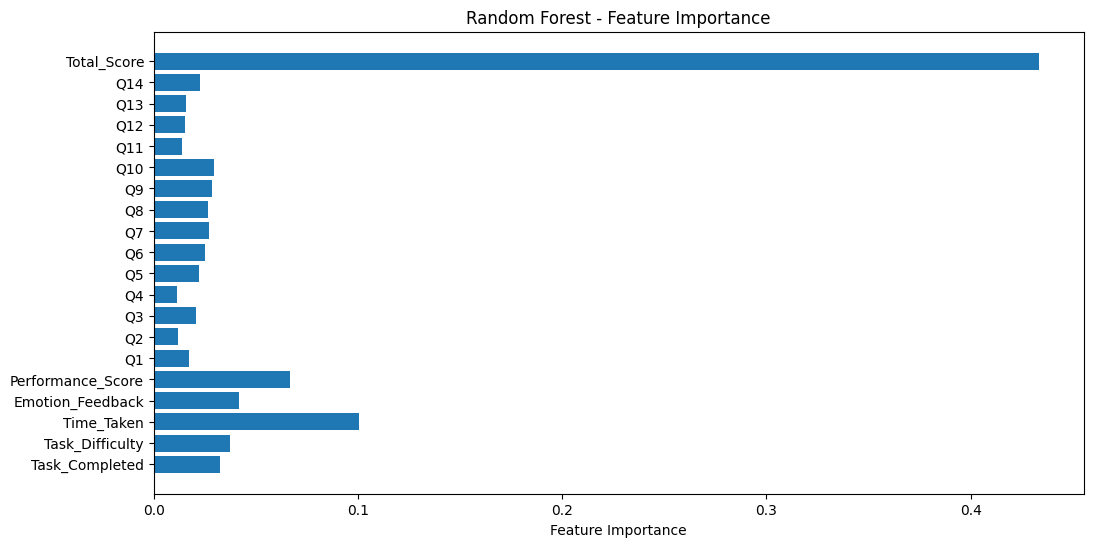

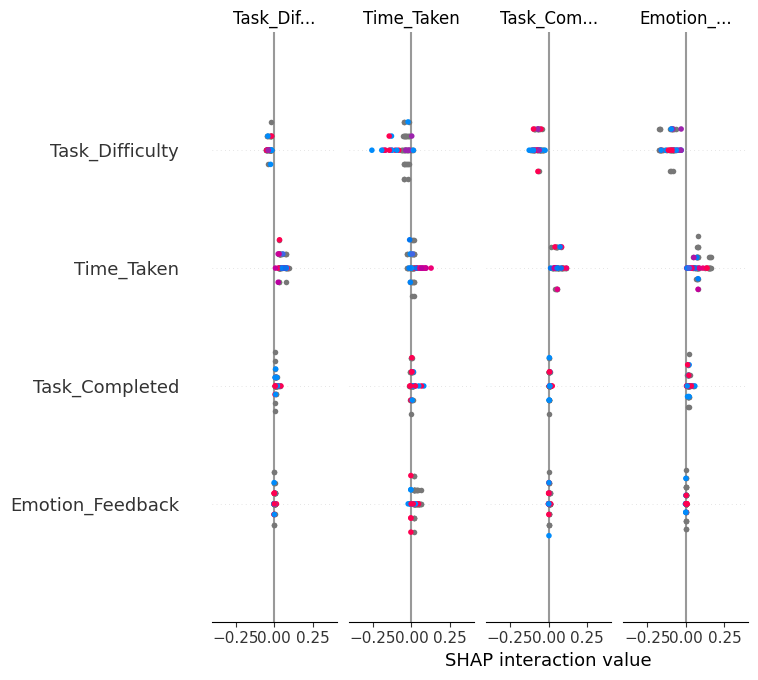

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [7]:


import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt


X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
model = joblib.load('../models/depression_model.pkl')


importances = model.feature_importances_
feature_names = X_train.columns


plt.figure(figsize=(12, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, feature_names=feature_names)


sample = X_test.iloc[[0]]  # Pick first sample
predicted_class = model.predict(sample)[0]

# SHAP values for this sample
sample_shap_values = shap_values[predicted_class][0]

# Create a waterfall plot (very clear)
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[predicted_class],
    sample_shap_values,
    feature_names=sample.columns
)

